# Maxwell, Trevor
## Final Project
### Predicting Hospital Readmissions

In [1]:
# Download Thinkstats2 and Thinkplot libraries

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
# import necessary packages

import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy import stats
import statistics as stats
from scipy.stats import pearsonr

In [3]:
# read .csv() file of hospital readmission data

hospital_df = pd.read_csv('hospital_readmissions.csv')
hospital_df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


#### Describe the variables

- **age**
    - age range of the patient

- **time_in_hospital**
    - in days, duration of the patient stay
    
- **n_procedures**
    - number of procedures performed during the hospital stay
    - medical intervention that remedies injury or illness
    - can be surgical or non-surgical
    
- **n_lab_procedures**
    - number of laboratory procedures performed during the hospital stay

- **n_medications**
    - number of medications administered during the day

- **n_outpatient**
    - number of outpatient visits in the year before a hospital stay
    
- **n_inpatient**
    - number of inpatient visits in the year before a hospital stay
    
- **n_emergency**
    - number of visits to the emergency room in the year before the hospital stay
    
- **medical_specialty**
    - the specialty of the admitting physician
    
- **diag_1**
    - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
    
- **diag_2**
    - secondary diagnosis
    
- **diag_3**
    - additional secondary diagnosis
    
- **glucose_test**
    - whether the glucose serum came out as high (> 200), normal, or not performed
    
- **A1Ctest**
    - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
    
- **change**
    - whether there was a change in the diabetes medication ('yes' or 'no')
    
- **diabetes_med**
    - whether a diabetes medication was prescribed ('yes' or 'no')
    
- **readmitted**
    - if the patient was readmitted at the hospital ('yes' or 'no')

In [4]:
# Descriptive stats on numeric variables

hospital_df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


## Histograms prior to cleaning

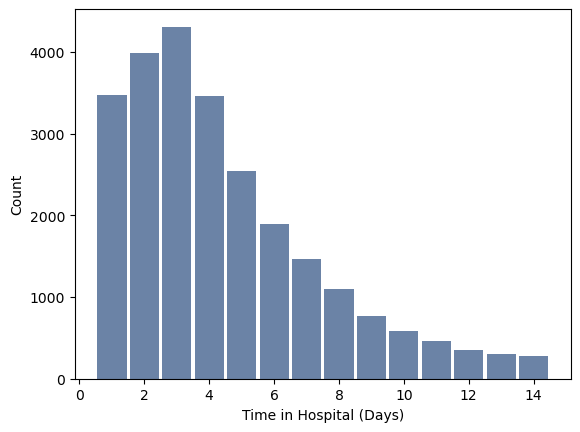

In [5]:
# Histogram of duration in hospital

hist = thinkstats2.Hist(hospital_df.time_in_hospital)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Time in Hospital (Days)", ylabel="Count")

In [6]:
# Descriptive stats for duration in hospital

mean = np.mean(hospital_df.time_in_hospital)
mode = stats.mode(hospital_df.time_in_hospital)
quantiles = np.quantile(hospital_df.time_in_hospital, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("Days in hospital is skewed to the right.")

Mean: 4.45332
Mode: 3
Spread: [ 1.  2.  4.  6. 14.]
Days in hospital is skewed to the right.


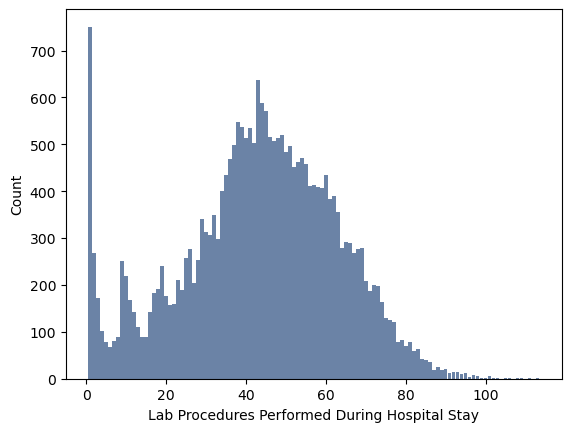

In [7]:
# Histogram of the number of lab procedures

hist = thinkstats2.Hist(hospital_df.n_lab_procedures)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Lab Procedures Performed During Hospital Stay", ylabel="Count")

In [8]:
# Descriptive stats for the number of lab procedures

mean = np.mean(hospital_df.n_lab_procedures)
mode = stats.mode(hospital_df.n_lab_procedures)
quantiles = np.quantile(hospital_df.n_lab_procedures, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("Lab procedures would be emulate a normal distribution if there wasn't a peak at 1 lab procedure performed.")

Mean: 43.24076
Mode: 1
Spread: [  1.  31.  44.  57. 113.]
Lab procedures would be emulate a normal distribution if there wasn't a peak at 1 lab procedure performed.


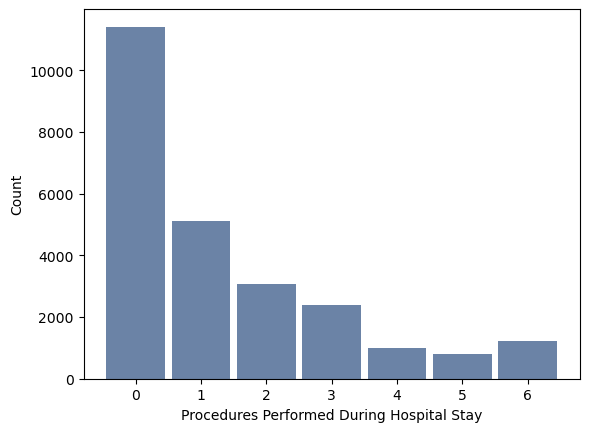

In [9]:
# Histogram of the number of procedures

hist = thinkstats2.Hist(hospital_df.n_procedures)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Procedures Performed During Hospital Stay", ylabel="Count")

In [10]:
# descriptive stats for the number of procedures

mean = np.mean(hospital_df.n_procedures)
mode = stats.mode(hospital_df.n_procedures)
quantiles = np.quantile(hospital_df.n_procedures, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("Procedures performed is skewed to the right.")

Mean: 1.35236
Mode: 0
Spread: [0. 0. 1. 2. 6.]
Procedures performed is skewed to the right.


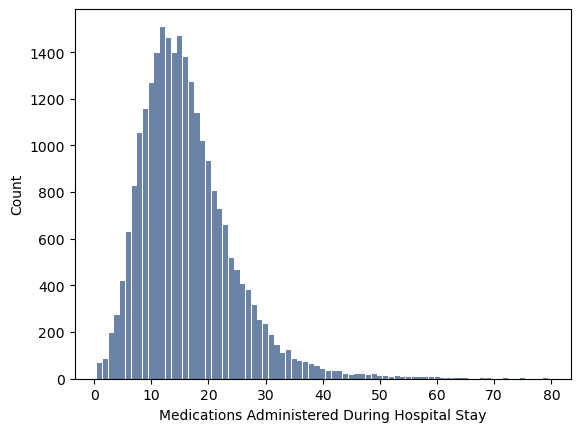

In [11]:
# Histogram of the number of medications administered during the hospital stay

hist = thinkstats2.Hist(hospital_df.n_medications)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Medications Administered During Hospital Stay", ylabel="Count")

In [12]:
# descriptive stats for medications administered during the hospital stay

mean = np.mean(hospital_df.n_medications)
mode = stats.mode(hospital_df.n_medications)
quantiles = np.quantile(hospital_df.n_medications, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("Medications administered is skewed to the right.")

Mean: 16.2524
Mode: 12
Spread: [ 1. 11. 15. 20. 79.]
Medications administered is skewed to the right.


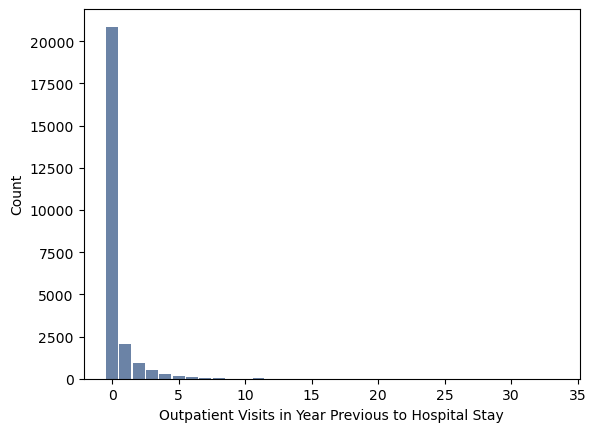

In [13]:
# Histogram of outpatient visits in year previous to hospital stay

hist = thinkstats2.Hist(hospital_df.n_outpatient)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Outpatient Visits in Year Previous to Hospital Stay", ylabel="Count")

In [14]:
# descriptive stats for outpatient visits in year previous to hospital stay

mean = np.mean(hospital_df.n_outpatient)
mode = stats.mode(hospital_df.n_outpatient)
quantiles = np.quantile(hospital_df.n_outpatient, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("There are a few outliers in outpatient visits. While I believe these are accurate, they are rare events and will be removed.")

Mean: 0.3664
Mode: 0
Spread: [ 0.  0.  0.  0. 33.]
There are a few outliers in outpatient visits. While I believe these are accurate, they are rare events and will be removed.


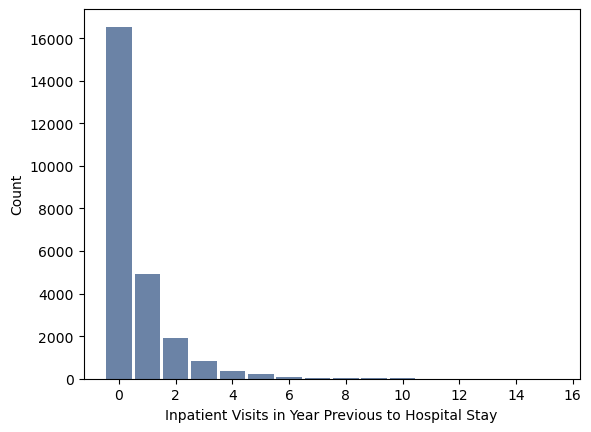

In [15]:
# histogram for inpatient visits in year previous to hospital stay

hist = thinkstats2.Hist(hospital_df.n_inpatient)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Inpatient Visits in Year Previous to Hospital Stay", ylabel="Count")

In [16]:
# descriptive stats for inpatient visits in year previous to hospital stay

mean = np.mean(hospital_df.n_inpatient)
mode = stats.mode(hospital_df.n_inpatient)
quantiles = np.quantile(hospital_df.n_inpatient, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("There are a few outliers in inpatient visits. While I believe these are accurate, they are rare events and will be removed.")

Mean: 0.61596
Mode: 0
Spread: [ 0.  0.  0.  1. 15.]
There are a few outliers in inpatient visits. While I believe these are accurate, they are rare events and will be removed.


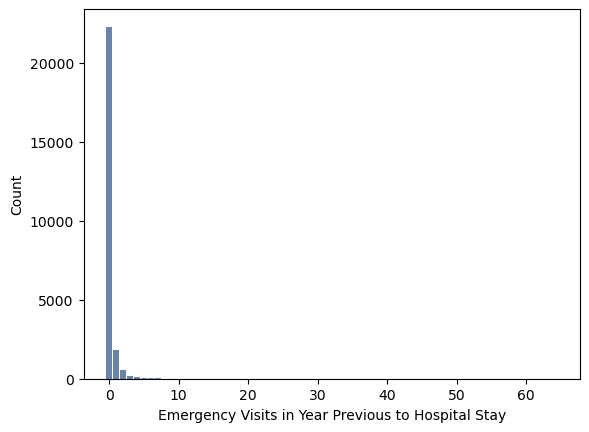

In [17]:
# Histogram for emergency visits in year previous to hospital stay

hist = thinkstats2.Hist(hospital_df.n_emergency)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Emergency Visits in Year Previous to Hospital Stay", ylabel="Count")

In [18]:
# descriptive stats for emergency visits in year previous to hospital stay

mean = np.mean(hospital_df.n_emergency)
mode = stats.mode(hospital_df.n_emergency)
quantiles = np.quantile(hospital_df.n_emergency, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")
print("There are a few outliers in emergency visits. While I believe these are accurate, they are rare events and will be removed.")

Mean: 0.1866
Mode: 0
Spread: [ 0.  0.  0.  0. 64.]
There are a few outliers in emergency visits. While I believe these are accurate, they are rare events and will be removed.


## Histograms after cleaning

In [19]:
# remove outliers from medications administered

hospital_df_010 = hospital_df[hospital_df["n_medications"] <= 65]

In [20]:
# remove outliers from outpatient visits

hospital_df_100 = hospital_df_010[hospital_df_010["n_outpatient"] < 10]

In [21]:
# remove outliers from inpatient visits

hospital_df_200 = hospital_df_100[hospital_df_100["n_inpatient"] <= 10]

In [22]:
# remove outliers from emergency visits

hospital_df_300 = hospital_df_200[hospital_df_200["n_emergency"] < 10]

#### Recreate histograms after removal of outliers

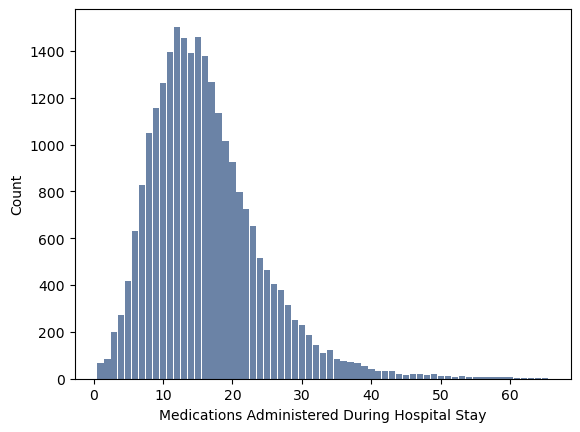

In [23]:
hist = thinkstats2.Hist(hospital_df_300.n_medications)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Medications Administered During Hospital Stay", ylabel="Count")

In [24]:
# descriptive stats for medications administered during hospital stay after cleaning

mean = np.mean(hospital_df_300.n_medications)
mode = stats.mode(hospital_df_300.n_medications)
quantiles = np.quantile(hospital_df_300.n_medications, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")

Mean: 16.228784956605594
Mode: 12
Spread: [ 1. 11. 15. 20. 65.]


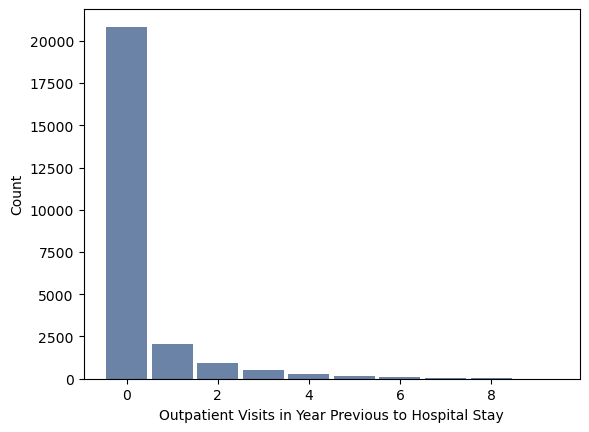

In [25]:
hist = thinkstats2.Hist(hospital_df_300.n_outpatient)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Outpatient Visits in Year Previous to Hospital Stay", ylabel="Count")

In [26]:
# descriptive stats for outpatient visits in year previous to hospital stay after cleaning

mean = np.mean(hospital_df_300.n_outpatient)
mode = stats.mode(hospital_df_300.n_outpatient)
quantiles = np.quantile(hospital_df_300.n_outpatient, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")

Mean: 0.32995821279331405
Mode: 0
Spread: [0. 0. 0. 0. 9.]


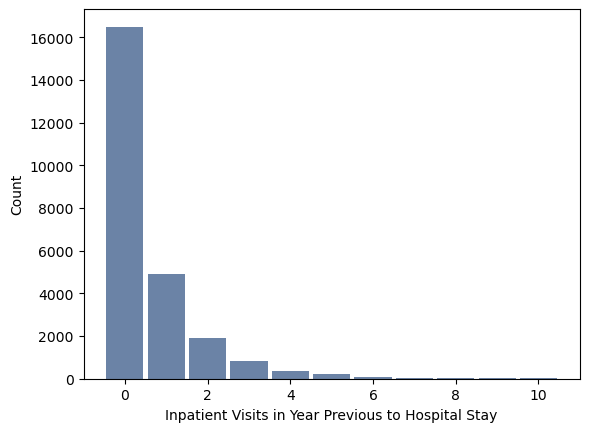

In [27]:
hist = thinkstats2.Hist(hospital_df_300.n_inpatient)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Inpatient Visits in Year Previous to Hospital Stay", ylabel="Count")

In [28]:
# descriptive stats for inpatient visits in year previous to hospital stay after cleaning

mean = np.mean(hospital_df_300.n_inpatient)
mode = stats.mode(hospital_df_300.n_inpatient)
quantiles = np.quantile(hospital_df_300.n_inpatient, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")

Mean: 0.6036644165863067
Mode: 0
Spread: [ 0.  0.  0.  1. 10.]


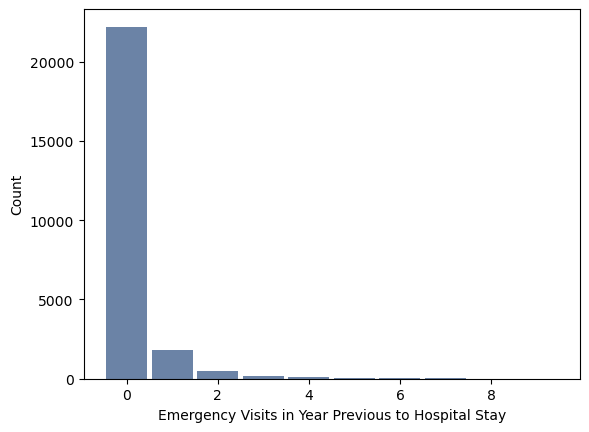

In [29]:
hist = thinkstats2.Hist(hospital_df_300.n_emergency)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Emergency Visits in Year Previous to Hospital Stay", ylabel="Count")

In [30]:
# descriptive stats for emergency visits in year previous to hospital stay after cleaning

mean = np.mean(hospital_df_300.n_emergency)
mode = stats.mode(hospital_df_300.n_emergency)
quantiles = np.quantile(hospital_df_300.n_emergency, [0, 0.25, 0.5, 0.75, 1])

print(f"Mean: {mean}")
print(f"Mode: {mode}")
print(f"Spread: {quantiles}")

Mean: 0.16843458694953392
Mode: 0
Spread: [0. 0. 0. 0. 9.]


In [31]:
# descriptive statistics for all numeric variables

hospital_df_300.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000
mean,4.450297,43.209298,1.352338,16.228785,0.329958,0.603664,0.168435
std,3.001175,19.816250,1.714708,8.011602,0.945546,1.131569,0.608862
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.000000,113.000000,6.000000,65.000000,9.000000,10.000000,9.000000


## Creating PMFs comparing Medications Administered for those who were eventually readmitted to the hospital against those who were not readmitted

In [32]:
# separate population that was readmitted vs. not readmitted

readmitted = hospital_df_300[hospital_df_300["readmitted"] == "yes"]
not_readmitted = hospital_df_300[hospital_df_300["readmitted"] == "no"]

In [33]:
print(readmitted.readmitted.value_counts())
print(not_readmitted.readmitted.value_counts())

yes    11659
Name: readmitted, dtype: int64
no    13229
Name: readmitted, dtype: int64


In [34]:
# create probablility mass functions (PMF) on number of medications for two populations created above

readmit_med_pmf = thinkstats2.Pmf(readmitted.n_medications, label="Readmitted")
non_readmit_med_pmf = thinkstats2.Pmf(not_readmitted.n_medications, label="Not Readmitted")

In [35]:
readmit_med_pmf

Pmf({15: 0.061583326185779226, 13: 0.059696371901535296, 12: 0.05875289475941333, 16: 0.05755210566943992, 14: 0.05712325242302085, 11: 0.05678016982588558, 17: 0.05369242645166824, 18: 0.050090059181748005, 10: 0.04657346256111159, 19: 0.04314263658975898, 9: 0.04168453555193413, 8: 0.039540269319838756, 20: 0.03936872802127112, 21: 0.03628098464705378, 22: 0.031820910884295395, 23: 0.030448580495754354, 7: 0.026931983875117936, 24: 0.024015781799468224, 25: 0.021699974268805215, 6: 0.019126854790290762, 26: 0.018269148297452614, 27: 0.01638219401320868, 5: 0.013465991937558968, 28: 0.013294450638991338, 29: 0.009863624667638734, 30: 0.00943477142121966, 4: 0.008405523629813878, 31: 0.007719358435543357, 3: 0.006261257397718501, 34: 0.00506046830774509, 32: 0.00506046830774509, 38: 0.0036881379192040486, 33: 0.0036023672699202333, 35: 0.003259284672784973, 36: 0.002487348829230637, 1: 0.002230036881379192, 2: 0.002058495582811562, 37: 0.0019727249335277468, 39: 0.0019727249335277468, 

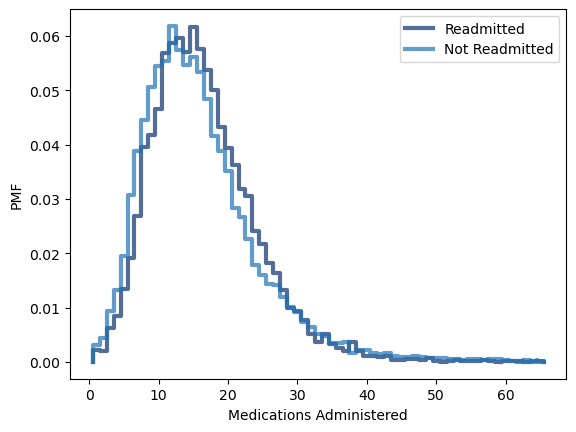

In [36]:
# plot PMFs for two populations for medications administered

thinkplot.Pmfs([readmit_med_pmf, non_readmit_med_pmf])
thinkplot.Config(xlabel="Medications Administered", ylabel = 'PMF')

In [37]:
# create probablility mass functions (PMF) on time in hospital for two populations created above

readmit_days_pmf = thinkstats2.Pmf(readmitted.time_in_hospital, label="Readmitted")
non_readmit_days_pmf = thinkstats2.Pmf(not_readmitted.time_in_hospital, label="Not Readmitted")

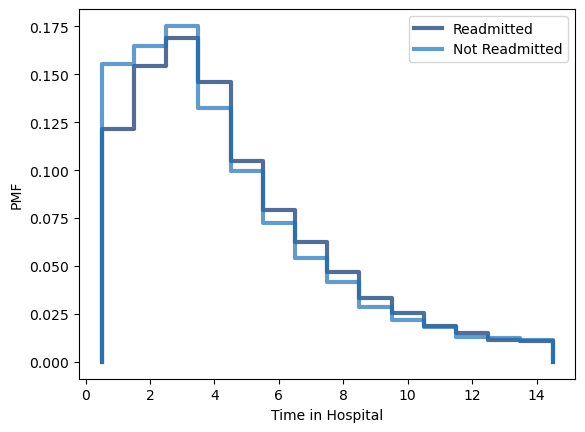

In [38]:
# plot PMFs for two populations for time in hospital

thinkplot.Pmfs([readmit_days_pmf, non_readmit_days_pmf])
thinkplot.Config(xlabel="Time in Hospital", ylabel="PMF")

## Creating a CDF of medications administered during the hospital stay

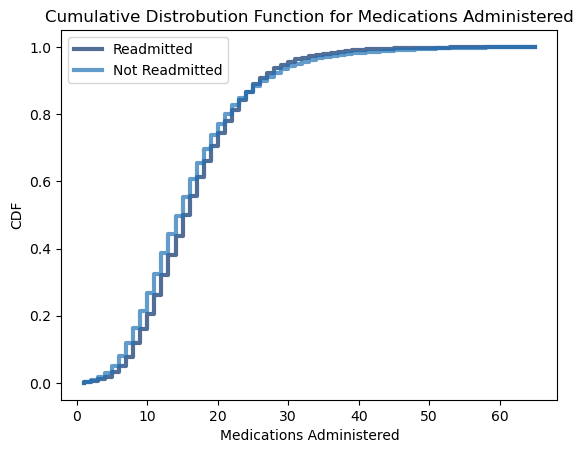

In [41]:
# create CDF of the number of medications for readmitted vs. not readmitted populations

cdf = thinkstats2.Cdf(readmitted.n_medications, label='Readmitted')
thinkplot.Cdf(cdf)
cdf = thinkstats2.Cdf(not_readmitted.n_medications, label='Not Readmitted')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Medications Administered', ylabel='CDF')
plt.title("Cumulative Distrobution Function for Medications Administered");

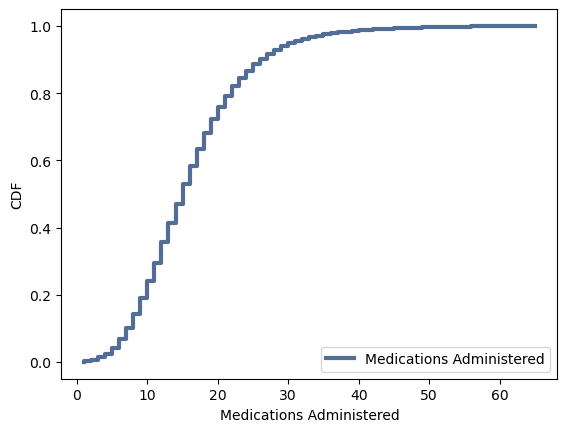

In [42]:
# create CDF of the number of medications for total populations

cdf = thinkstats2.Cdf(hospital_df_300.n_medications, label='Medications Administered')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Medications Administered', ylabel='CDF')

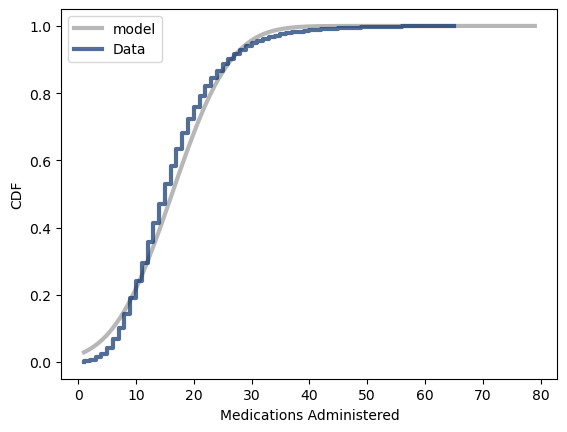

In [43]:
# create CDF of the total number of medications and normalized model

mu = np.mean(hospital_df_300.n_medications)
var = np.var(hospital_df_300.n_medications)
sigma = np.sqrt(var)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=1, high=79)
thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(hospital_df_300.n_medications, label='Data')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Medications Administered', ylabel='CDF')

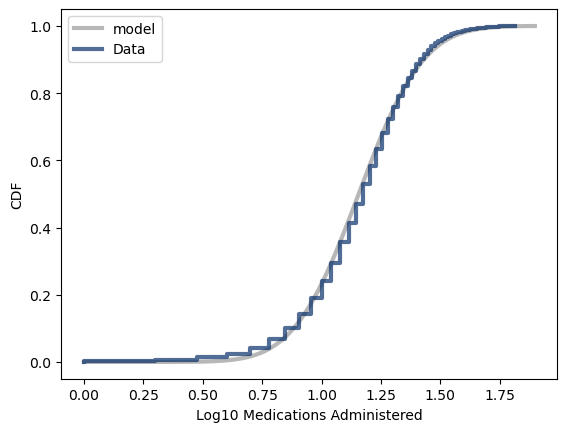

In [44]:
# create CDF of the Log10 total number of medications and Log10 normalized model

mu = np.mean(np.log10(hospital_df_300.n_medications))
var = np.var(np.log10(readmitted.n_medications))
sigma = np.sqrt(var)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=np.log10(1), high=np.log10(79))
thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(np.log10(hospital_df_300.n_medications), label='Data')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Log10 Medications Administered', ylabel='CDF')

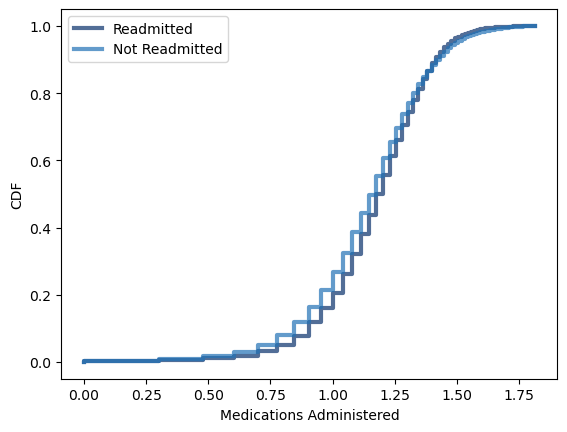

In [45]:
# create CDF of the Log10 number of medications for readmitted vs. not readmitted

cdf = thinkstats2.Cdf(np.log10(readmitted.n_medications), label='Readmitted')
thinkplot.Cdf(cdf)
cdf = thinkstats2.Cdf(np.log10(not_readmitted.n_medications), label='Not Readmitted')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Medications Administered', ylabel='CDF')

## Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

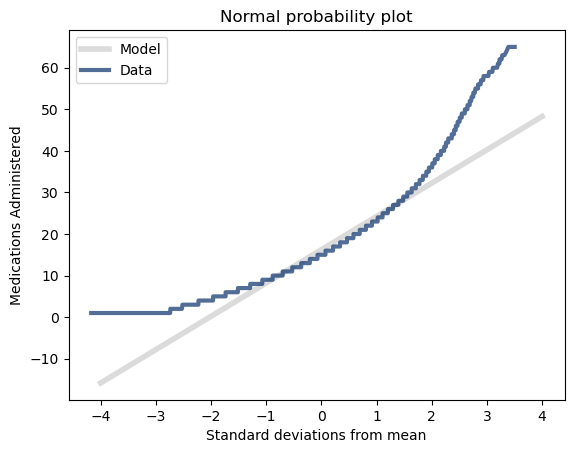

In [46]:
# Create normal probability plot for medications administered

mean = np.mean(hospital_df_300.n_medications)
var = np.var(hospital_df_300.n_medications)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8", label = 'Model')

xs, ys = thinkstats2.NormalProbability(hospital_df_300.n_medications)
thinkplot.Plot(xs, ys, label="Data")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Medications Administered",
)

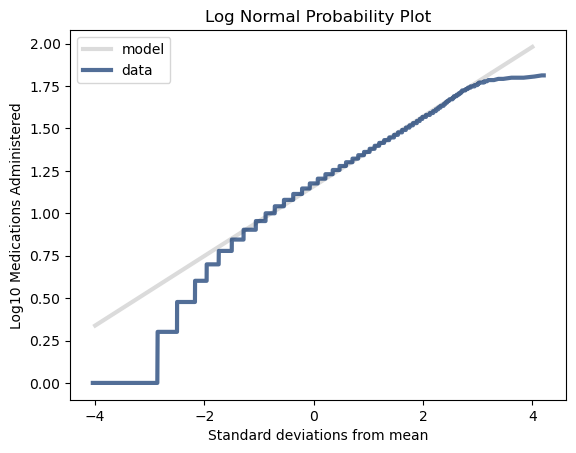

In [47]:
# Create log normal probability plot for medications administered

log_n_medications = np.log10(hospital_df_300.n_medications)
# mean = np.mean(log_n_medications)
# var = np.var(log_n_medications)
mean, var = thinkstats2.TrimmedMeanVar(log_n_medications, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
xs, ys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(xs, ys, color="0.8", label="model")

xs, ys = thinkstats2.NormalProbability(log_n_medications)
thinkplot.Plot(xs, ys, label="data")
    
    
    
thinkplot.Config(
    title="Log Normal Probability Plot",
    xlabel="Standard deviations from mean",
    ylabel="Log10 Medications Administered",
)

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [48]:
# create dataframe of numeric variables to calculate Pearson's correlation coefficient between variables

hospital_df_numeric = hospital_df_300[["n_medications", "n_lab_procedures", "time_in_hospital",
                                      "n_procedures", "n_outpatient"]]

In [49]:
# calculate Pearson's correlation coefficients

hospital_df_numeric.corr(method = 'pearson')

,n_medications,n_lab_procedures,time_in_hospital,n_procedures,n_outpatient
n_medications,1.000000,0.270828,0.448346,0.366694,0.040027
n_lab_procedures,0.270828,1.000000,0.327801,0.047961,-0.024588
time_in_hospital,0.448346,0.327801,1.000000,0.177809,-0.018589
n_procedures,0.366694,0.047961,0.177809,1.000000,-0.037581
n_outpatient,0.040027,-0.024588,-0.018589,-0.037581,1.000000


In [50]:
# function to jitter variables for better visualization 

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

In [51]:
meds = Jitter(hospital_df_300.n_medications, 0.5)
days = Jitter(hospital_df_300.time_in_hospital, 0.5)

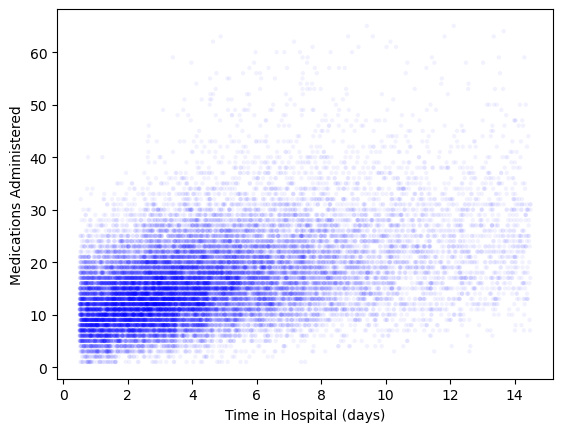

In [52]:
thinkplot.Scatter(days, hospital_df_300.n_medications, alpha=0.05, s=10)
thinkplot.Config(ylabel='Medications Administered',
                 xlabel='Time in Hospital (days)',
                 legend=False)

In [53]:
# calculate covariance for medications administered vs. time in hospital

thinkstats2.Cov(hospital_df_300.n_medications, hospital_df_300.time_in_hospital)

10.77969330566221

In [54]:
procedures = Jitter(hospital_df_300.n_procedures, 0.5)

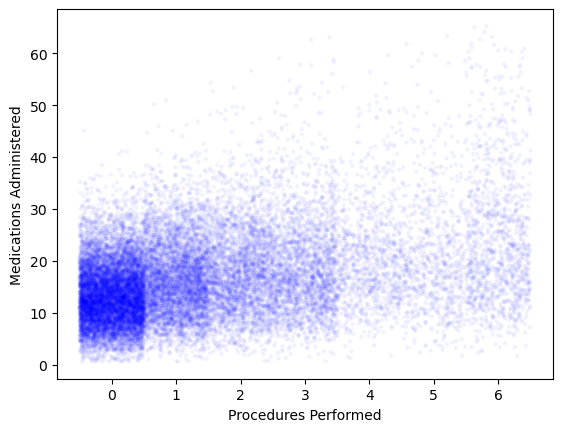

In [55]:
thinkplot.Scatter(procedures, meds, alpha=0.05, s=10)
thinkplot.Config(ylabel='Medications Administered',
                 xlabel='Procedures Performed',
                 legend=False)

In [56]:
# calculate covariance for medications administered vs. procedures performed

thinkstats2.Cov(hospital_df_300.n_medications, hospital_df_300.n_procedures)

5.037278395834362

## Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [57]:
# create class to calculate difference in means hypothesis test

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [ ]:
# run difference in means hypothesis test for readmitted vs. not readmitted for number of medications

data = readmitted.n_medications, not_readmitted.n_medications

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

In [ ]:
# create class for correlation hypothesis test

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [55]:
# run correlation hypothesis test for number of medications administered vs. time in hospital

data = hospital_df_300.n_medications, hospital_df_300.time_in_hospital

ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [56]:
# alternative method of calculating correlation and pvalue

pearsonr(hospital_df_300.time_in_hospital, hospital_df_300.n_medications)

PearsonRResult(statistic=0.4483458174554214, pvalue=0.0)

## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [57]:
# create logistic regression analysis on readmissions vs. number of medications administered

import statsmodels.formula.api as smf

hospital_df_300['readmitted_yes'] = (hospital_df_300['readmitted'] == 'yes').astype(int)
model = smf.logit('readmitted_yes ~ n_medications', data=hospital_df_300)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.690528
         Iterations 4


C:\Users\trevo\AppData\Local\Temp\ipykernel_60004\1245916138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_df_300['readmitted_yes'] = (hospital_df_300['readmitted'] == 'yes').astype(int)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         readmitted_yes   No. Observations:                24888
Model:                          Logit   Df Residuals:                    24886
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:               0.0009083
Time:                        22:47:40   Log-Likelihood:                -17186.
converged:                       True   LL-Null:                       -17201.
Covariance Type:            nonrobust   LLR p-value:                 2.271e-08
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2703      0.029     -9.400      0.000      -0.327      -0.214
n_medications     0.0089      0.002      5.585      0.000       0.006       0.012
=================================================================================
"""